In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, accuracy_score,mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from plotnine import *

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()
penguins["year"] = penguins["year"].astype("object")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [3]:
X = penguins.drop(['species'],axis=1)
y = penguins["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1)

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)), 
    ("standardize", StandardScaler(),make_column_selector(dtype_include=np.number)) 
  ],
  remainder = "passthrough"
)

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [4]:
#KNN k = 5

#Create Pipeline
knn_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsClassifier(n_neighbors=5))
   ]
)

knn_pipeline_fitted = knn_pipeline_1.fit(X,y)

knn_ypred = knn_pipeline_fitted.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, knn_ypred)
print("Confusion Matrix:\n", conf_matrix)

# Overall Accuracy
accuracy = accuracy_score(y_test, knn_ypred)
print("Accuracy:", accuracy)

# Precision, Recall, F1-score
class_report = classification_report(y_test, knn_ypred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[87  1  0]
 [ 1 41  0]
 [ 0  0 70]]
Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99        88
   Chinstrap       0.98      0.98      0.98        42
      Gentoo       1.00      1.00      1.00        70

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [5]:
#KNN k = 150

knn_pipeline_2 = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsClassifier(n_neighbors=150))
   ]
)

knn_pipeline_fitted2 = knn_pipeline_2.fit(X,y)

knn_ypred2 = knn_pipeline_fitted2.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, knn_ypred2)
print("Confusion Matrix:\n", conf_matrix)

# Overall Accuracy
accuracy = accuracy_score(y_test, knn_ypred2)
print("Accuracy:", accuracy)

# Precision, Recall, F1-score
class_report = classification_report(y_test, knn_ypred2)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[88  0  0]
 [35  7  0]
 [ 0  0 70]]
Accuracy: 0.825
Classification Report:
               precision    recall  f1-score   support

      Adelie       0.72      1.00      0.83        88
   Chinstrap       1.00      0.17      0.29        42
      Gentoo       1.00      1.00      1.00        70

    accuracy                           0.82       200
   macro avg       0.91      0.72      0.71       200
weighted avg       0.87      0.82      0.78       200



In [6]:
#Decision Tree min leaf samples = 5

#Create Pipeline
dt_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("DecisionTrees", DecisionTreeClassifier(min_samples_leaf=5))
   ]
)

dt_pipeline_fitted = dt_pipeline_1.fit(X,y)

dt_ypred = dt_pipeline_fitted.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, dt_ypred)
print("Confusion Matrix:\n", conf_matrix)

# Overall Accuracy
accuracy = accuracy_score(y_test, dt_ypred)
print("Accuracy:", accuracy)

# Precision, Recall, F1-score
class_report = classification_report(y_test, dt_ypred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[85  3  0]
 [ 1 41  0]
 [ 0  0 70]]
Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

      Adelie       0.99      0.97      0.98        88
   Chinstrap       0.93      0.98      0.95        42
      Gentoo       1.00      1.00      1.00        70

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [11]:
#Decision Tree min leaf samples = 100

#Create Pipeline
dt_pipeline_2 = Pipeline(
  [("preprocessing", ct),
  ("DecisionTrees", DecisionTreeClassifier(min_samples_leaf=100))
   ]
)

dt_pipeline_fitted2 = dt_pipeline_2.fit(X,y)

dt2_ypred = dt_pipeline_fitted2.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(dt2_ypred, y_test)
print("Confusion Matrix:\n", conf_matrix)

# Overall Accuracy
accuracy = accuracy_score(dt2_ypred,y_test)
print("Accuracy:", accuracy)

# Precision, Recall, F1-score
class_report = classification_report(y_test, dt2_ypred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[61  0  0]
 [25 40  0]
 [ 2  2 70]]
Accuracy: 0.855
Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      0.69      0.82        88
   Chinstrap       0.62      0.95      0.75        42
      Gentoo       0.95      1.00      0.97        70

    accuracy                           0.85       200
   macro avg       0.85      0.88      0.85       200
weighted avg       0.90      0.85      0.86       200



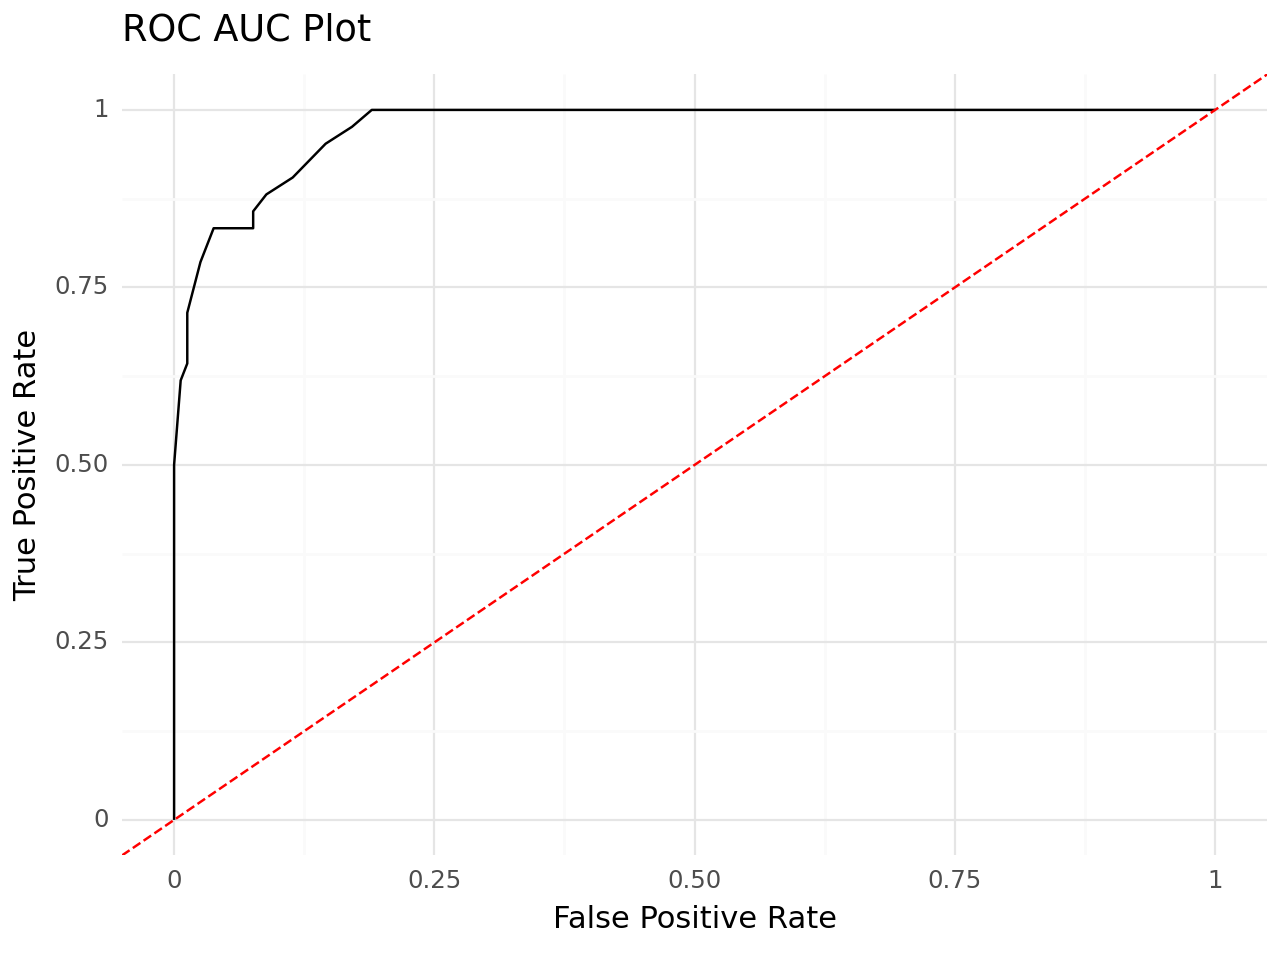

In [24]:
#ROC AUC plot

knn_pipeline = Pipeline(
    [("preprocessing", ct),
     ("knn", KNeighborsClassifier(n_neighbors=50))]
)

knn_pipeline.fit(X_train, y_train)

# Predict probs
y_pred_prob = knn_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _= roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Df
roc_data = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr
})

# Plot
roc_plot = (ggplot(roc_data, aes(x='False Positive Rate', y='True Positive Rate')) 
            + geom_line()
            + geom_abline(linetype='dashed', color='red') 
            + labs(x='False Positive Rate',y='True Positive Rate',title="ROC AUC Plot")  
            + theme_minimal()
            )
print(roc_plot)
